In [139]:
import numpy as np
import math

from sim import EulerRichardson
from sim import G7, G1, solve_ode
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def projectile(t,y,b):
  x, y, vx, vy = y
  speed = np.sqrt(vx**2 + vy**2)

  g = b.g
  drag = b.get_drag(speed)

  u_x = vx / speed if speed != 0 else 0
  u_y = vy / speed if speed != 0 else 0

  ax = -drag * u_x
  ay = g - drag * u_y

  return np.array([vx, vy, ax, ay])


class BallisticModel:
    def __init__(self, bc=0.424, rho=0.0765, vs=1125, vx0=2625, vy0=1, x0=0, y0=0.1, g=-32.174, reference=G1, units="imperial"):
        self.bc = bc * 144 / 32.174
        self.rho = rho / 32.174
        self.vs = vs
        self.vx0 = vx0
        self.vy0 = vy0
        self.x0 = x0
        self.y0 = y0
        self.g = g
        self.reference = reference
        self.units = units

        self.mach_arr = []
        self.cd_arr = []

        self.get_cd = self.interpolate(self.reference)

    def interpolate(self, reference):
        return interp1d(reference[:, 0], reference[:, 1])

    def get_drag(self, speed):
        mach = speed / self.vs
        cd = self.get_cd(mach)
        self.mach_arr.append(mach)

        drag = 0.5 * (1 / self.bc) * self.rho * speed**2 * cd
        self.cd_arr.append(drag)
        return drag



In [140]:
def plot_reference(mach, cd):
    g1 = BallisticModel(reference=G1)

    g7 = BallisticModel(reference=G7)
    plt.figure(figsize=(5, 3))
    plt.plot(g1.reference[:, 0], g1.reference[:, 1], 'black', label='G1')
    plt.plot(g7.reference[:, 0], g7.reference[:, 1], 'r-', label='G7')
    plt.plot(mach, cd, 'b-', label='G1')

    plt.axvline(x=1.0, color='k', linestyle='--', label='Speed of Sound')
    plt.ylabel('Cd')
    plt.xlabel('Mach Number')
    plt.title('Falling Body Simulation using Euler Method')
    plt.legend()
    plt.grid(True)


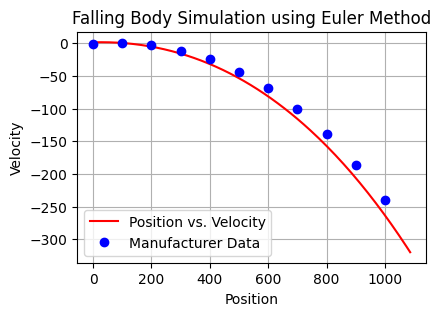

In [141]:
b = BallisticModel(bc=1.05, vx0=2815)
y0 = np.array([b.x0, b.y0, b.vx0, b.vy0])
dt = 0.01
t0 = 0.0
tf = 1.4

t, y = solve_ode(projectile, (t0, tf), y0, EulerRichardson, b, first_step=dt)
vx = y[:, 2]
vy = y[:, 3]
x = y[:, 0]
y = y[:, 1]
'''
man_x = np.array([0, 100, 200, 300, 600, 800, 1000])
man_v = np.array([2625, 2473, 2325, 2183, 1786, 1545, 1332])
man_y = np.array([0, 0, -4, -15, -94, -200, -365])
'''

man_x = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])  # Range in yards
man_v = np.array([2815, 2727, 2641, 2557, 2474, 2393, 2314, 2235, 2159, 2083, 2010])  # Velocity in ft/s
man_y = np.array([-1.5,  0.0, -3.2, -11.4, -24.9, -44.0, -69.3, -101.0, -139.7, -185.9, -240.1])


plt.figure(figsize=(4.5, 3))

plt.plot(x/3, y*12, 'r-', label='Position vs. Velocity')
plt.plot(man_x, man_y, 'bo', label='Manufacturer Data')

plt.ylabel('Velocity')
plt.xlabel('Position')
plt.title('Falling Body Simulation using Euler Method')
plt.legend()
plt.grid(True)

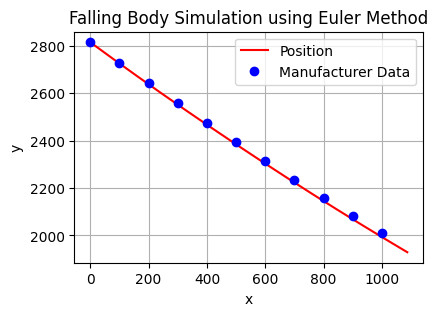

In [142]:
plt.figure(figsize=(4.5, 3))

plt.plot(x/3, vx, 'r-', label='Position')
plt.plot(man_x, man_v, 'bo', label='Manufacturer Data')

plt.ylabel('y')
plt.xlabel('x')
plt.title('Falling Body Simulation using Euler Method')
plt.legend()
plt.grid(True)

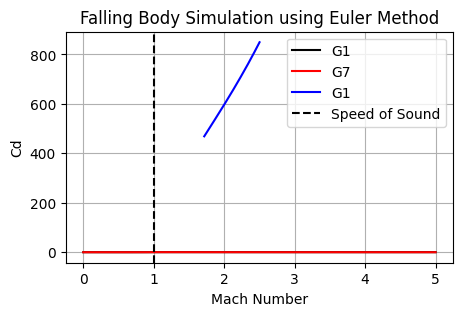

In [143]:
plot_reference(b.mach_arr, b.cd_arr)